<a href="https://colab.research.google.com/github/ramsoi53/ramsoi/blob/main/ML_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/files')

In [2]:
!pwd

/content/drive/MyDrive/Colab Notebooks/files


# Project Practice - Kaggle's Titanic competition
Detailed Time Schedule

*   Import files and check files - 2022.04.04 
*   Check nulls and deal with them - 2022.04.04
*   Data Preprocessing
    - Set up the logic
    - Visulaization
    - Check Outliners and deal with it  - 2022.04.04








In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


In [4]:
# Import and read files

train_df = pd.read_csv('ttn_train.csv')
test_df = pd.read_csv('tn_test.csv')

In [5]:
# shape of each data

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Let's see how each data looks like
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Age and Sex:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Male')

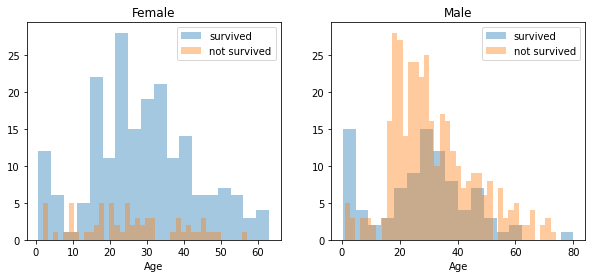

In [7]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
women = train_df[train_df['Sex'] == 'female']
men = train_df[train_df['Sex'] == 'male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label=survived, ax=axes[0], kde=False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label=not_survived, ax=axes[0], kde=False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['Survived']==1].Age.dropna(),ax=axes[1], bins=18, label=survived, kde=False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label=not_survived, ax=axes[1], kde=False)
ax.legend()
ax.set_title('Male')


# Embarked, Pclass and Sex

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


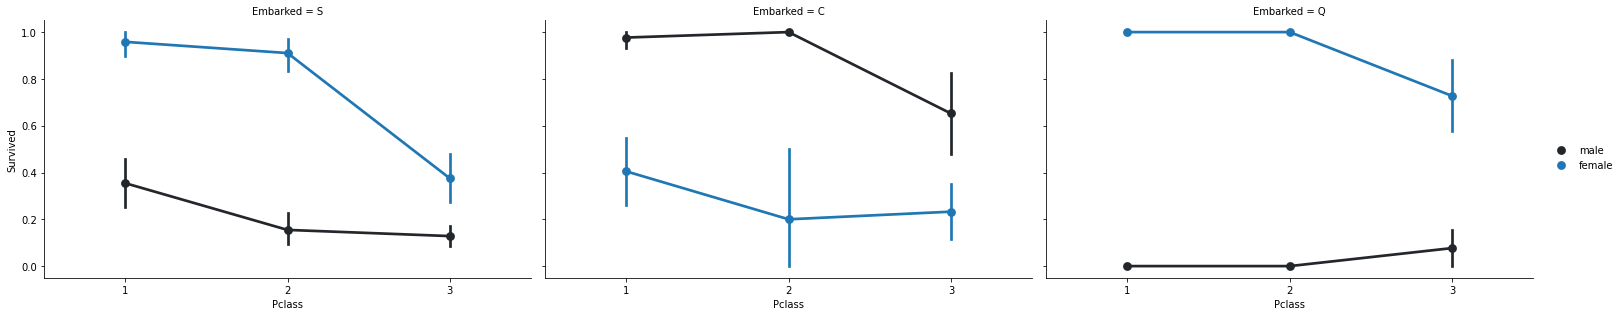

In [8]:
FacetGrid = sns.FacetGrid(train_df, col='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None, order=None, hue_order=None)
FacetGrid.add_legend()

# Pclass

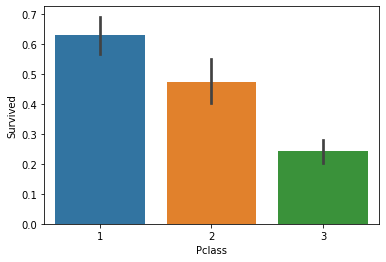

In [9]:
sns.barplot(x= 'Pclass', y= 'Survived', data=train_df)


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


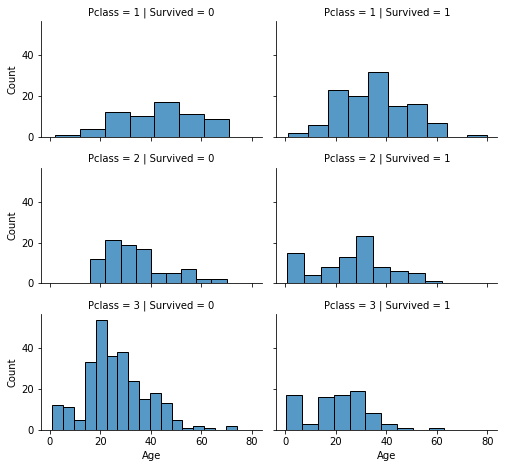

In [10]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(sns.histplot, 'Age')
grid.add_legend()

## SibSp and Parch


In [11]:
data = [train_df, test_df]
for dataset in data:
  dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
  dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
  dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
  dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()



1    537
0    354
Name: not_alone, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


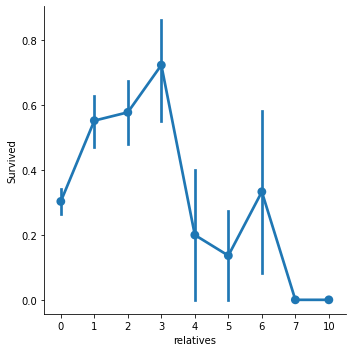

In [12]:
axes = sns.factorplot('relatives', 'Survived', data=train_df)


# Data Preprocessing

In [13]:
train_df = train_df.drop(['PassengerId'], axis=1)


# Missing Data

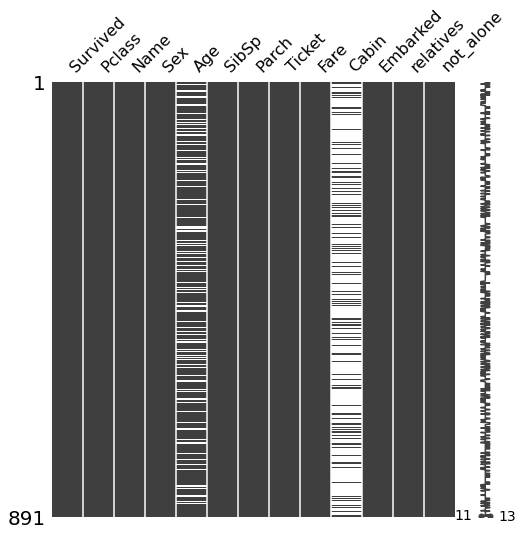

In [14]:
import missingno as msno
msno.matrix(df=train_df, figsize=(8,8))



# Cabin

In [15]:
import re
deck = {"A":1, "B":2, "C":3, "D":4, "E":5, "F":6, "G":7, "U":8}
data=[train_df, test_df]

for dataset in data:
  dataset['Cabin'] = dataset['Cabin'].fillna("U0")
  dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
  dataset['Deck'] = dataset['Deck'].map(deck)
  dataset['Deck']=dataset['Deck'].fillna(0)
  dataset['Deck'] = dataset['Deck'].astype(int)

train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)


# Cabin 좀 더 공부하려면 아래 참조
https://www.kaggle.com/code/ccastleberry/titanic-cabin-features/notebook

# Age 이해가 잘 안간다

In [16]:
data = [train_df, test_df]

for dataset in data:
  mean = train_df['Age'].mean()
  std = train_df['Age'].std()
  is_null = dataset['Age'].isnull().sum()
   #compute random numbers between the mean, std and is_null
  rand_age = np.random.randint(mean-std, mean+std, size=is_null)

  age_slice = dataset['Age'].copy()
  age_slice[np.isnan(age_slice)] = rand_age
  dataset['Age'] = age_slice
  dataset['Age'] = train_df['Age'].astype(int)


train_df['Age'].isnull().sum()

                                

0

# Embarked

In [17]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [18]:
data = [train_df, test_df]
common_value = 'S'

for dataset in data:
  dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

train_df.isnull().sum()

Survived     0
Pclass       0
Name         0
Sex          0
Age          0
SibSp        0
Parch        0
Ticket       0
Fare         0
Embarked     0
relatives    0
not_alone    0
Deck         0
dtype: int64

# Converting Features

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int64  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int64  
 12  Deck       891 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 90.6+ KB


# Fare

In [20]:
data= [train_df, test_df]
for dataset in data:
  dataset['Fare'] = dataset['Fare'].fillna(0)
  dataset['Fare'] = dataset['Fare'].astype(int)



# Name 모르는 코드가 너무 많다
We will use the feature to extract the Titles from the Name, so that we can build a new feature out of that.

In [21]:
train_df['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [22]:
data = [train_df, test_df]
titles = {"Mr":1,"Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5} 

for dataset in data:
  dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
  dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
  dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

  dataset['Title'] = dataset['Title'].map(titles)
  dataset['Title'] = dataset['Title'].fillna(0) #  filling NaN with 0, to get safe


train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)


# SEX

In [23]:
data = [train_df, test_df]
genders = {"male":0, "female": 1}
for dataset in data:
  dataset['Sex'] = dataset['Sex'].map(genders)

# Ticket

In [24]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [25]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

# Embarked



In [26]:
data=[train_df, test_df]
ports={"S":0, "C":1, "Q":2}

for dataset in data:
  dataset['Embarked'] = dataset['Embarked'].map(ports)

# Creating Categories

In [27]:
data = [train_df, test_df]

for dataset in data:
  dataset['Age'] = dataset['Age'].astype(int)
  dataset.loc[dataset['Age'] <=11, 'Age'] = 0
  dataset.loc[(dataset['Age']>11) & (dataset['Age']<=18), 'Age'] = 1
  dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
  dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
  dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
  dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
  dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
  dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [28]:
train_df['Age'].value_counts()

4    169
6    165
5    137
3    133
2    123
1     96
0     68
Name: Age, dtype: int64

## Fare

In [29]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [30]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,0,0,1,0,8,1
1,1,1,1,5,1,0,3,1,1,0,3,3
2,1,3,1,3,0,0,0,0,0,1,8,2
3,1,1,1,5,1,0,3,0,1,0,3,3
4,0,3,0,5,0,0,1,0,0,1,8,1


# Creating new Features
1. Age times Class
2. Fare per Person


In [31]:
data = [train_df, test_df]
for dataset in data:
  dataset['Age_Class'] = dataset['Age'] * dataset['Pclass']

In [32]:
for dataset in data:
  dataset['Fare_Per_Person'] = dataset['Fare'] / (dataset['relatives']+1)
  dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

test_df.shape


(418, 14)

# Buind ML Models

In [33]:
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
X_test = test_df.drop('PassengerId', axis=1).copy()

In [34]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [35]:
# Stochastic Gradient Descent(SGD)

sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
y_preds = sgd.predict(X_test)

sgd.score(X_train, y_train)

acc_sgd = round(sgd.score(X_train, y_train)*100, 2)

acc_sgd

76.99

In [36]:
# RandomForest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_preds = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

acc_random_forest


92.82

In [37]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_preds = logreg.predict(X_test)
logreg.score(X_train, y_train)
acc_logreg = round(logreg.score(X_train, y_train) *100 , 2)
acc_logreg

81.82

In [38]:
#KNearest Neighbor
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_preds = knn.predict(X_test)

acc_knn = round(knn.score(X_train, y_train) *100, 2)
acc_knn


86.42

In [39]:
# Gaussian Naive Bayes:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_preds = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, y_train)*100,2)
acc_gaussian

78.56

In [40]:
#Perceptron
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)

acc_perceptron

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


82.38

In [41]:
# Linear Support Vector Machine
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

acc_linear_svc

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


81.48

In [42]:
#Decision Tree

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

acc_decision_tree

92.82

# **Which is the best Model ?**

In [43]:
results = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree' ], 'Score': [acc_linear_svc, acc_knn, acc_logreg, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False).set_index('Score')

result_df.head(9)

,Model
Score,
92.82,Random Forest
92.82,Decision Tree
86.42,KNN
82.38,Perceptron
81.82,Logistic Regression
81.48,Support Vector Machines
78.56,Naive Bayes
76.99,Stochastic Gradient Decent


# KFOLD

In [44]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='accuracy')

print("Scores:", scores)
print("Mean:", scores.mean())
print("STD:", scores.std())



Scores: [0.75555556 0.80898876 0.75280899 0.85393258 0.86516854 0.83146067
 0.84269663 0.80898876 0.85393258 0.82022472]
Mean: 0.8193757802746567
STD: 0.03727718949472784


#RandomForest - Feature Importance

In [45]:
importances = pd.DataFrame({'features:':X_train.columns, 'importances': np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importances', ascending=False).set_index('importances')
importances

,features:
importances,
0.200,Sex
0.170,Title
0.099,Age_Class
0.089,Deck
0.076,Pclass
0.072,Age
0.065,Fare
0.062,relatives
0.050,Embarked


In [46]:
#Parch와 not_alone 삭제.. 별로 중요하지 않으니까..
train_df = train_df.drop("not_alone", axis=1)
test_df = test_df.drop("not_alone", axis=1)

train_df = train_df.drop("Parch", axis=1)
test_df = test_df.drop("Parch", axis=1)


In [47]:
#RandomForest Again

random_forest = RandomForestClassifier(n_estimators=100, oob_score=True)

random_forest.fit(X_train, y_train)
y_preds = random_forest.predict(X_test)

acc_random_forest = round(random_forest.score(X_train, y_train)*100,2)
acc_random_forest

92.82

In [48]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%") # 참고 https://inuplace.tistory.com/570

oob score: 82.27 %


# #Hyperparameter Tuning -> 공부가 필요하다

In [48]:
# param_grid = {"criterion": ["gini", "entropy"], "min_samples_leaf"}: [1,5,10,25,50,70], "min_sample_split": [2,4,10,12,16,18,25,35], "n_estimators":[100,400,700,1000,1500]}

# from sklearn.model_selection import GridSearchCV, cross_val_score

# rf=RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

# clf =GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)

# clf.fit(X_train,y_train)

# clf.bestparams

# Confusion Matrix

In [49]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)



array([[485,  64],
       [ 90, 252]])